In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
import numba as nb
from numba import njit
plt.rcParams['figure.figsize'] = (15, 15)

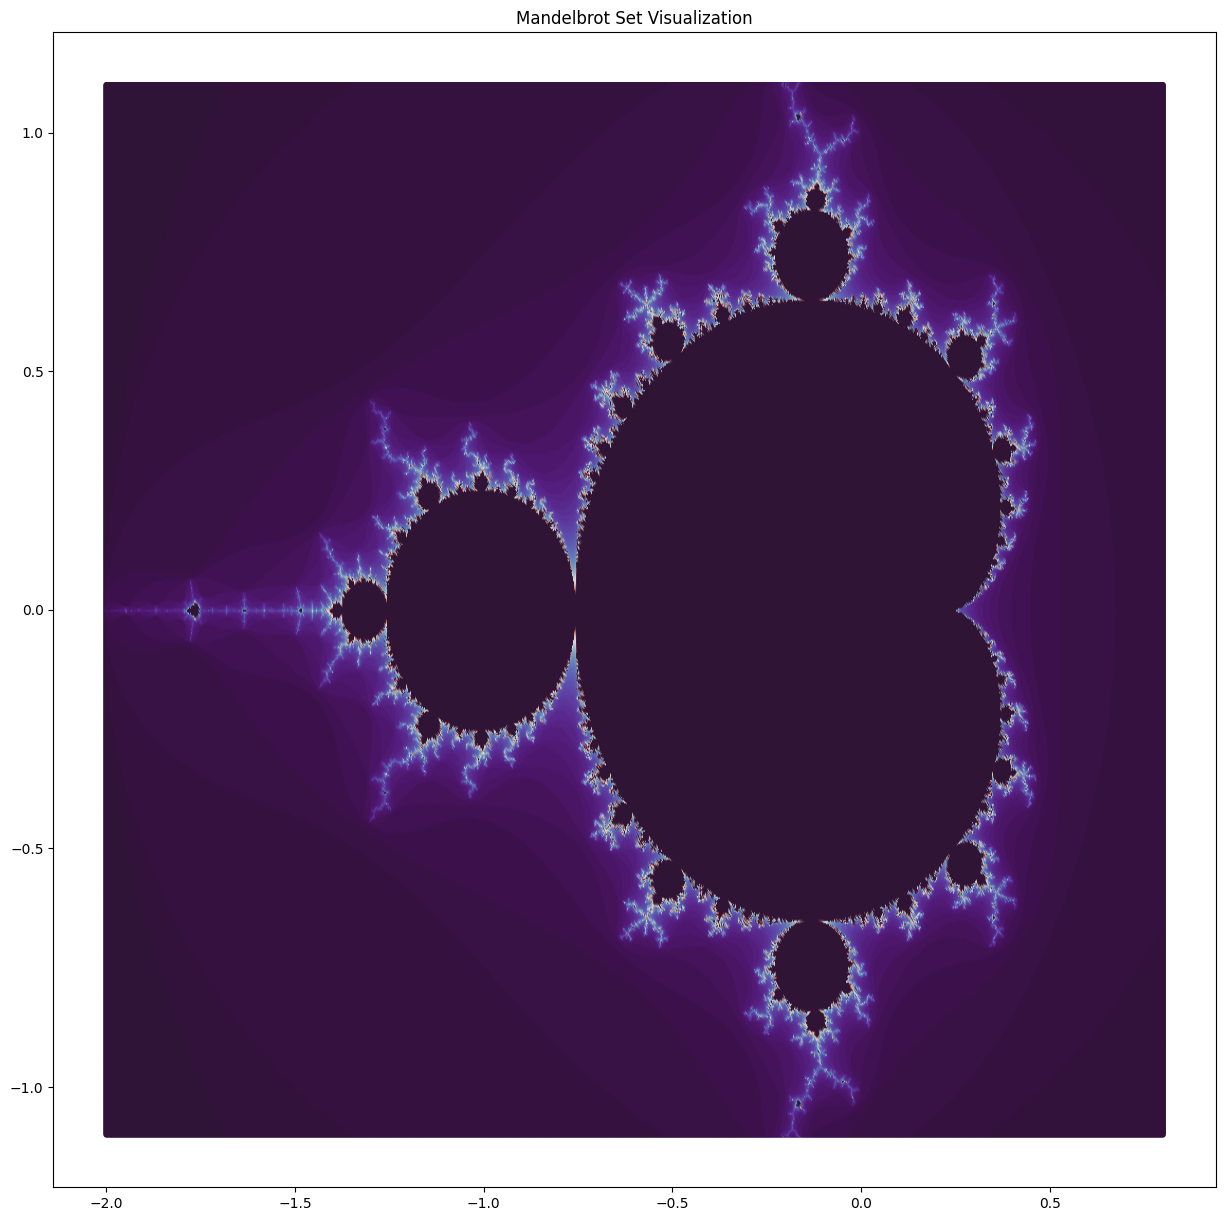

CPU times: total: 3.3 s
Wall time: 10.4 s


In [51]:
%%time
j = 1j
clist = []
iterationlist = []
iteration_max = 100
resolution = 1000
lin = np.linspace(-2,1, resolution)
@njit
def mandelbrot(max, space, resolution):
    clist = []
    iterationlist = []
    alin = np.linspace(-2,0.8,resolution)
    blin = np.linspace(-1.1,1.1,resolution)
    for a in alin:
        for b in blin:
            c = a + b * j
            z = 0
            iterations = 0

            while iterations < max and abs(z) <= 2: 
                z = z**2 + c
                iterations += 1
            clist.append(c)
            iterationlist.append(iterations)
    return clist,iterationlist
c,colors = mandelbrot(iteration_max,lin, resolution)
plt.scatter(np.real(c),np.imag(c),c = colors, cmap = 'twilight_shifted', marker='.')
#plt.colorbar(label='Iterations to deviate')
plt.title('Mandelbrot Set Visualization')
plt.show()


In [ ]:
%%time
j = 1j
clist = []
iterationlist = []
iteration_max = 100
resolution = 1000
lin = np.linspace(-2,1, resolution)
#@njit
def mandelbrot(max, space, resolution):
    clist = []
    iterationlist = []
    alin = np.linspace(-2,0.8,resolution)
    blin = np.linspace(-1.1,1.1,resolution)
    cgrid = np.meshgrid(alin,blin)
    #for a in alin:
    #    for b in blin:
    c = a + b * j
    z = 0
    iterations = 0
    while iterations < max and abs(z) <= 2: 
        z = z**2 + c
        iterations += 1
    clist.append(c)
    iterationlist.append(iterations)
    return clist,iterationlist
c,colors = mandelbrot(iteration_max,lin, resolution)
plt.scatter(np.real(c),np.imag(c),c = colors, cmap = 'twilight_shifted', marker='.')
#plt.colorbar(label='Iterations to deviate')
plt.title('Mandelbrot Set Visualization')
plt.show()


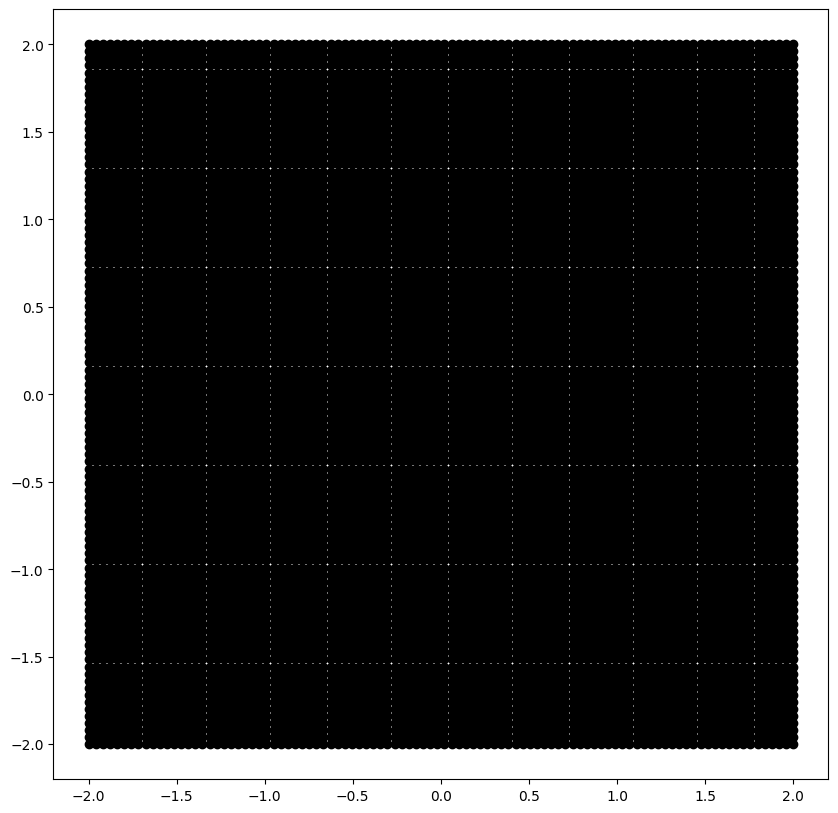

In [38]:
resolution = 100
j = 1j
alin = np.linspace(-2,2,resolution)
blin = np.linspace(-2,2,resolution)
grid = np.meshgrid(alin,blin)
gridtest = grid[0]+grid[1]*j
plt.plot(np.real(gridtest),np.imag(gridtest), 'o', color = "black")
plt.show()


C:\Users\konra\AppData\Local\Temp\ipykernel_20012\154457601.py:21: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + C
C:\Users\konra\AppData\Local\Temp\ipykernel_20012\154457601.py:21: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + C


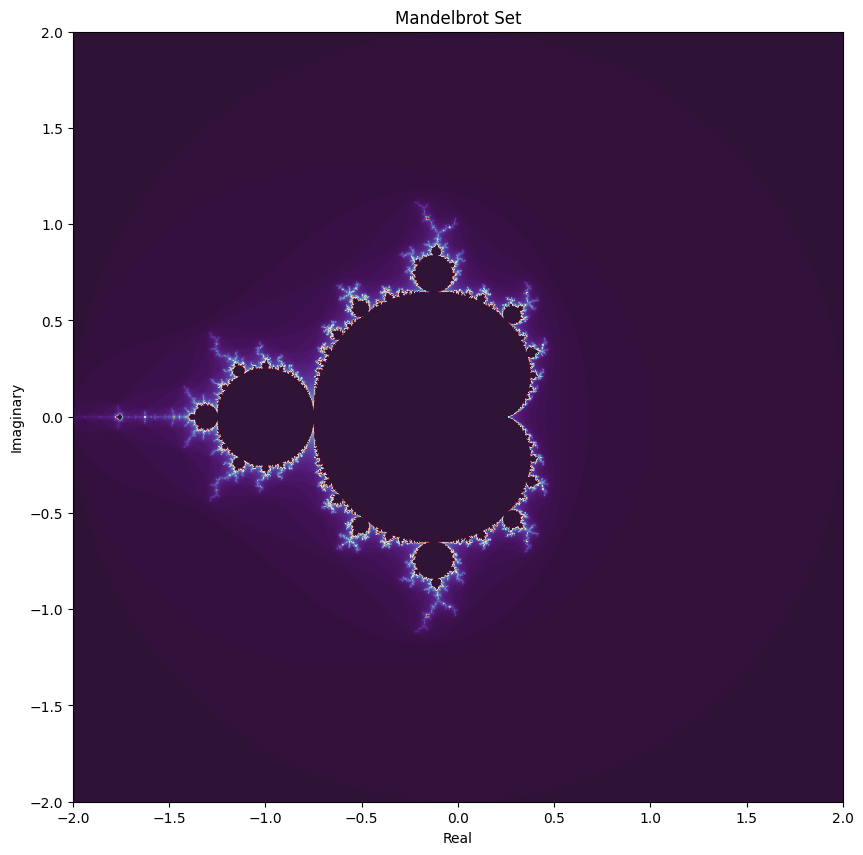

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming max is defined elsewhere in your code
max_iter = 100 

# Assuming alin and blin are defined elsewhere in your code
alin = np.linspace(-2, 2, 1000)
blin = np.linspace(-2, 2, 1000)

# Create a meshgrid
x, y = np.meshgrid(alin, blin)

# Initialize complex arrays
C = x + y * 1j
Z = np.zeros_like(C,dtype = complex)
iterations = np.zeros_like(C, dtype=int)

for i in range(max_iter):
    # Mandelbrot iteration
    Z = Z * Z + C
    
    # Mask for elements that are still within the boundary
    mask = np.abs(Z) <= 2
    #Z = np.where(mask, Z, 0)
    # Update iterations count
    iterations += mask
# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(iterations, extent=[np.min(alin), np.max(alin), np.min(blin), np.max(blin)], cmap='twilight_shifted', origin='lower')
#plt.colorbar(label='Iterations')
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()
